##**THE SPARKS FOUNDATION** 
### TASK 1 - Prediction using Supervised ML (Level - Beginner)
* Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?

\


####**Author: Urmi Sen** 
Data Science & Business Analytics Intern \
Website: https://urmisen.github.io/website/ \
Linkedin: https://www.linkedin.com/in/urmi-sen-78a821149/ \
Email: urmisen1202@gmail.com

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Size of the dataset :**

In [3]:
data.shape

(25, 2)

### **Checking the null values :**

In [4]:
# Checking the training data dose it has any null value or not
data.isnull().any().describe()

count         2
unique        1
top       False
freq          2
dtype: object

As here unique == 1 , thus the dataset is unique and here is no null value in the Dataset so, we can now visualize our Data.

### Dataset Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Description of the dataset :**

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Exploratory Data Analysis**

#### Univariate Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


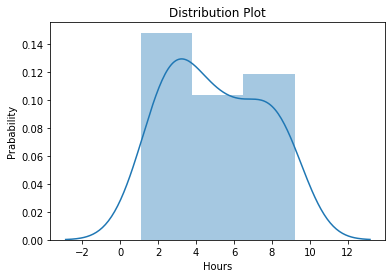

In [7]:
sns.distplot(data['Hours'])
plt.title('Distribution Plot')
plt.xlabel('Hours')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


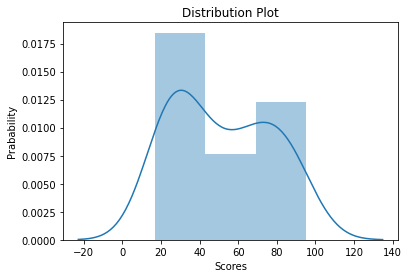

In [8]:
sns.distplot(data['Scores'])
plt.title('Distribution Plot')
plt.xlabel('Scores')
plt.ylabel('Prabability') 
plt.show()

From both the above graphs it can be observed that both the variables are slightly right skewed.

#### **Bivariate Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


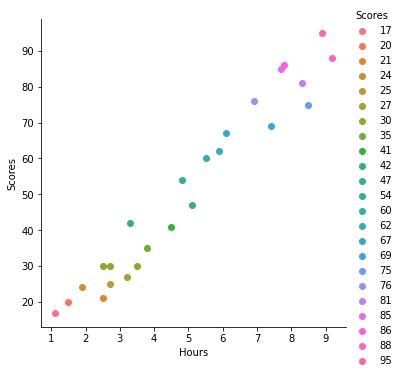

In [9]:
sns.FacetGrid(data,hue="Scores",size=5).map(plt.scatter,"Hours","Scores").add_legend();
plt.show()

From the above graph it can be observed that the variables hours and Scores are highly positively correlated as if the number of Hours increases so as the scores increases.

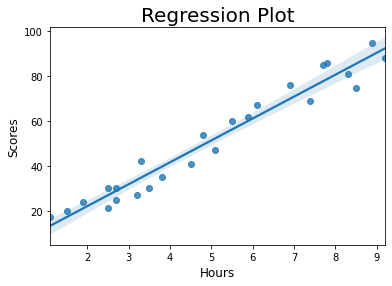

In [10]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()


#### **Multivariate Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


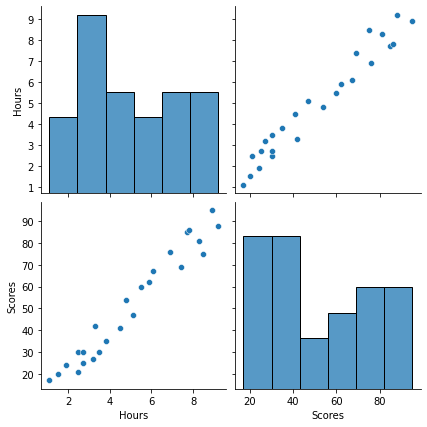

In [11]:
sns.pairplot(data,size=3)

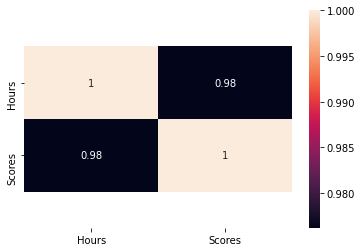

In [12]:
ax=sns.heatmap(data.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

It is confirmed that the variables are positively correlated.

#### **Splitting the Data**

In [13]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)

(16, 1)
(16,)


In [15]:
print(X_test.shape)
print(y_test.shape)

(9, 1)
(9,)


#### **Fitting the Data into the model**

In [16]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print("---------Model Trained---------")

---------Model Trained---------


#### **Predicting**

In [17]:
y_pred = regression.predict(X_test)
df_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df_prediction  

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


#### **Comparing the Predicted Marks with the Actual Marks**

In [18]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


#### **Visually Comparing the Predicted Marks with the Actual Marks**

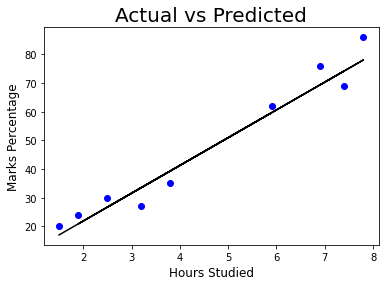

In [19]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### **Evaluating the Model**

In [20]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.691397441397446


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

#### *What will be predicted score if a student studies for 9.25 hrs/ day?**

In [21]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.145


According to the regression model if a student studies for 9.25 hrs/ day, he/she is likely to score 93.89 marks.

# **THANK YOU ...!  :)**